  <h2>Wczytywanie bibliotek</h2>

In [1]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
import os

random.seed(42)


In [2]:
train = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_training-set.csv')
test = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_testing-set.csv')


In [3]:
data = pd.concat([train,test]).reset_index(drop=True)
#leaving only normal and DoS data
data = data[data['attack_cat'].isin(['Normal', 'DoS'])]
cols_cat = data.select_dtypes('object').columns 
cols_numeric = data._get_numeric_data().columns 


In [4]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,109353.000000,109353.000000,109353.000000,109353.000000,1.093530e+05,1.093530e+05,1.093530e+05,109353.000000,109353.000000,1.093530e+05,...,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000
mean,46356.251900,1.229760,27.047872,31.266970,6.226179e+03,2.548154e+04,3.851711e+04,115.223606,77.496411,4.376300e+07,...,1.830878,1.290564,4.008596,0.012263,0.012336,0.137637,4.026977,5.366007,0.033634,0.149543
std,32861.363364,5.762437,106.350786,150.418904,1.211829e+05,1.992933e+05,1.134210e+05,107.352027,100.800574,1.745830e+08,...,2.306730,1.608228,5.334296,0.110224,0.111043,0.615860,4.152302,5.484808,0.180287,0.356625
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,23767.000000,0.001036,2.000000,2.000000,2.000000e+02,8.600000e+01,2.865123e+01,31.000000,29.000000,1.151318e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,37436.000000,0.037116,10.000000,8.000000,8.640000e+02,3.540000e+02,1.396927e+03,31.000000,29.000000,4.502699e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
75%,71429.000000,0.710897,22.000000,18.000000,2.558000e+03,3.380000e+03,4.681497e+03,254.000000,60.000000,1.737126e+06,...,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,7.000000,0.000000,0.000000
max,175249.000000,59.999989,8669.000000,11018.000000,1.163118e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.344000e+09,...,46.000000,46.000000,63.000000,2.000000,2.000000,16.000000,47.000000,62.000000,1.000000,1.000000


In [5]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
#sprawdzanie i usuwanie brakujach wartosci
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<Axes: >

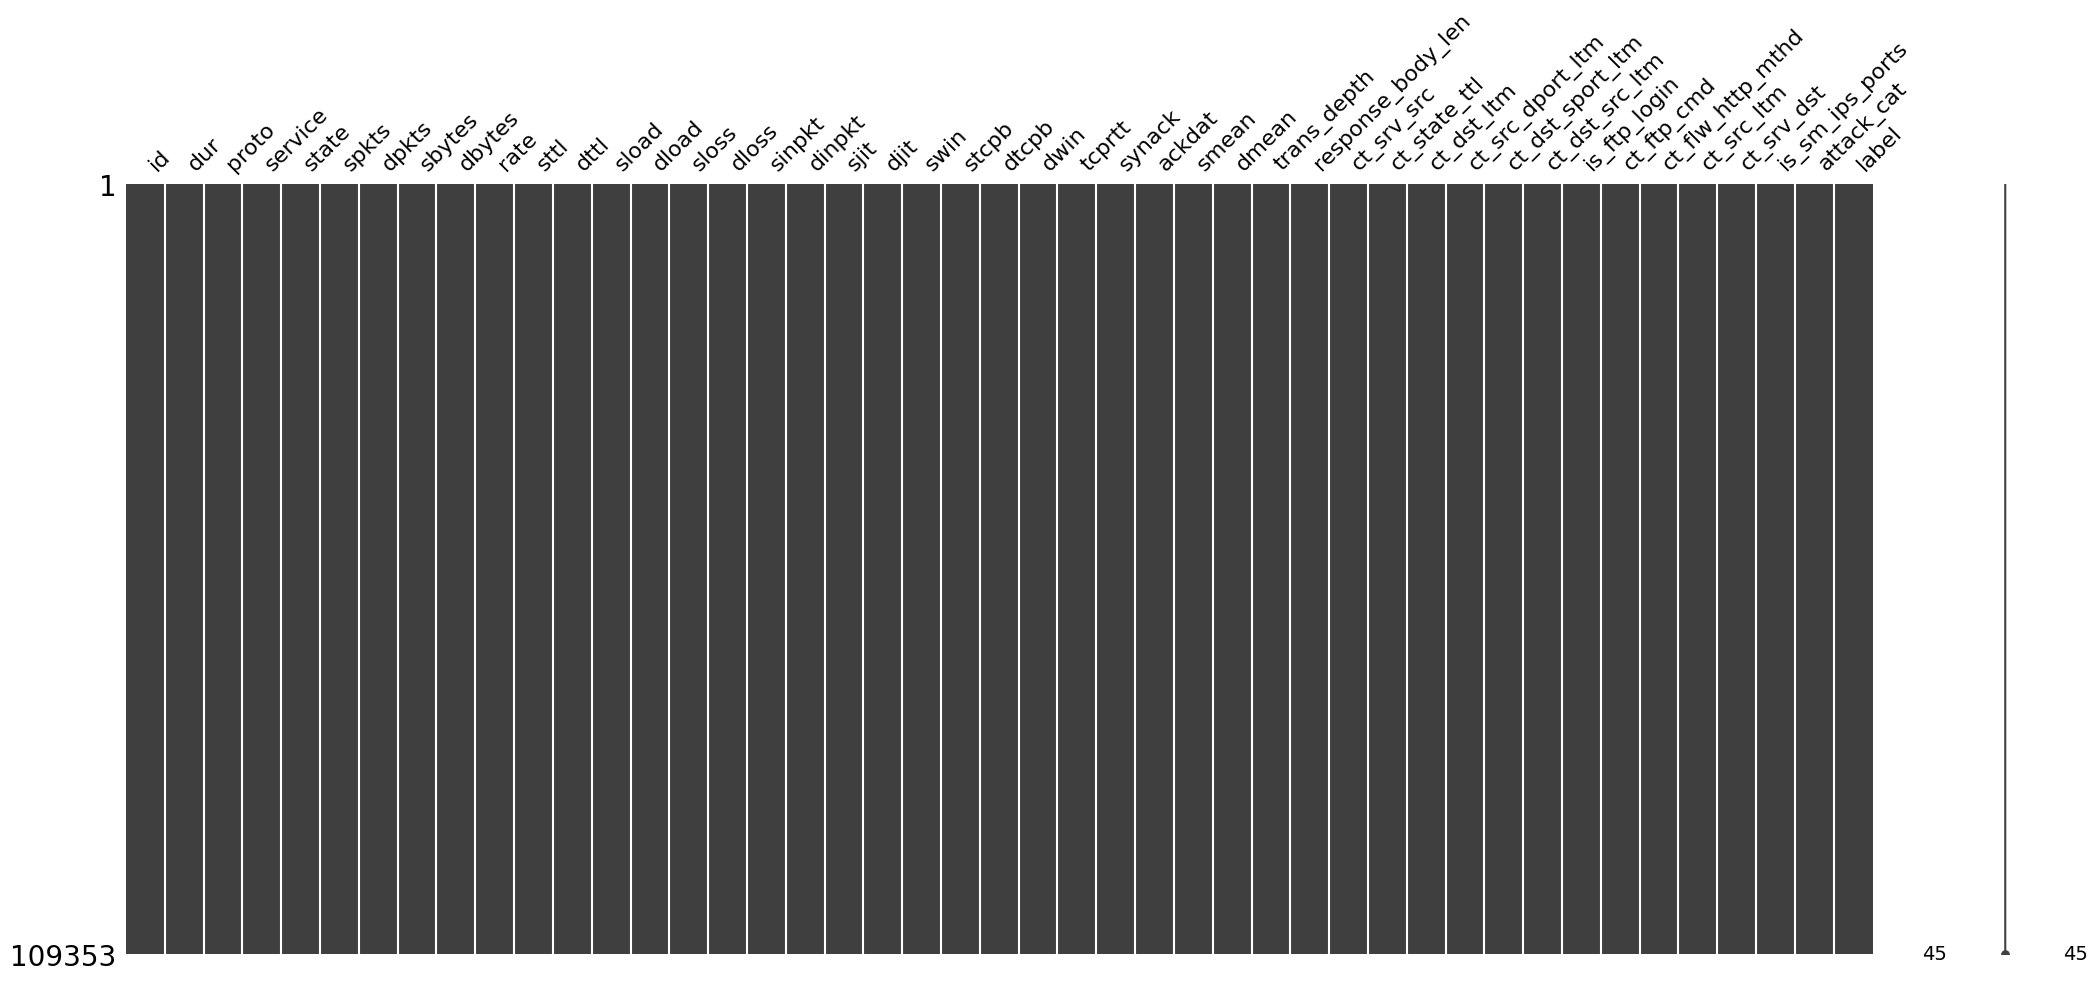

In [7]:
missingno.matrix(data)

<h3>sprawdzamy naglowki tabel</h3>

In [8]:
data['proto'].unique()


array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'ip', 'ipnip', 'st2', 'argus',
       'egp', 'nvp', 'pup', 'mux', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'mfe-nsp', 'merit-inp',
       '3pc', 'ddp', 'idpr-cmtp', 'tp++', 'sdrp', 'ipv6-frag',
       'ipv6-route', 'idrp', 'gre', 'mhrp', 'i-nlsp', 'rvd', 'mobile',
       'narp', 'skip', 'sctp', 'ipv6-no', 'ipv6-opts', 'sat-expak',
       'ippc', 'kryptolan', 'any', 'sat-mon', 'cpnx', 'wsn', 'pvp',
       'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'nsfnet-igp',
       'dgp', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'pri-enc',
       'gmtp', 'ifmp', 'pnni', 'ggp', 'cbt', 'bbn-rcc', 'emcon', 'igp',
       'xnet', 'dcn', 'bna', 'swipe', 'chaos', 'cftp', 'visa', 'ipcv',
       'cphb', 'iso-tp4', 'netblt', 'wb-expak', 'sep', 'secure-vmtp',
       'vines', 'il', 'eigrp', 'tcf', 'sprite-rpc', 'tlsp', 'unas', 'rdp',
       'idpr', 'ipv6', 'rsvp', 'iso-ip', 'micp', 'encap', 'etherip',
       'pim', 'ar

In [9]:
data['service'].unique() 
data['service']= np.where(data['service'] == '-', 'None', data['service'])
print(data['service'].unique())


['None' 'http' 'snmp' 'smtp' 'pop3' 'ftp' 'ftp-data' 'dns' 'ssl' 'dhcp'
 'irc' 'ssh' 'radius']


In [10]:
data['state'].unique()


array(['INT', 'FIN', 'REQ', 'CON', 'RST', 'ACC', 'ECO', 'PAR', 'URN',
       'no'], dtype=object)

In [11]:
print(data['sttl'].dtype)
data['sttl'] = pd.to_numeric(data['sttl'], errors='coerce')


int64


<h3>usuwamy puste wartosci</h3>

In [12]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data


In [13]:
cols = data.columns
data_bin = Remove_dump_values(data, cols)


In [14]:
data_bin = data_bin.drop(['id'], axis=1) 
data_bin.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
data_bin_hot = pd.get_dummies(data_bin,columns=cols_cat)
data_bin_hot.shape


(109353, 196)

In [15]:
data_bin_hot.head()


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.1e-05,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,8e-06,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,5e-06,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,6e-06,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1e-05,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3> Normalizowanie wartosci</h3>

In [16]:
cols_numeric = list(cols_numeric)
cols_numeric.remove('label')
cols_numeric.remove('id')


In [17]:
data_bin_hot[cols_numeric] = data_bin_hot[cols_numeric].astype('float') 


In [18]:
data_bin_hot[cols_numeric] = (data_bin_hot[cols_numeric] - np.min(data_bin_hot[cols_numeric])) / np.std(data_bin_hot[cols_numeric])


In [19]:
data_bin_hot.head()


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.908923e-06,0.018806,0.0,0.004093,0.0,0.801523,2.366058,0.0,1.033116,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1.388308e-06,0.018806,0.0,0.014540,0.0,1.102094,2.366058,0.0,5.046333,0.0,...,False,False,False,False,True,False,False,False,False,False
2,8.676924e-07,0.018806,0.0,0.008813,0.0,1.763350,2.366058,0.0,4.893969,0.0,...,False,False,False,False,True,False,False,False,False,False
3,1.041231e-06,0.018806,0.0,0.007427,0.0,1.469459,2.366058,0.0,3.436776,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1.735385e-06,0.018806,0.0,0.017544,0.0,0.881675,2.366058,0.0,4.871057,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3>Sprawdzanie waznosci poszczegolnych zmiennych</h3>


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches


# Selecting only 10 features
selected_features = [
    'sbytes', 'sload', 'smean', 'dbytes', 'rate',
    'ct_srv_dst', 'dur', 'ct_dst_sport_ltm', 'dload', 'ct_srv_src'
]

# Split the data into training and test sets
X = data_bin_hot[selected_features]
y = data_bin_hot['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [38]:

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(5, 15)  # Adjust the range of K if necessary
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train, y_train)
    inertia.append(kmeans.inertia_)



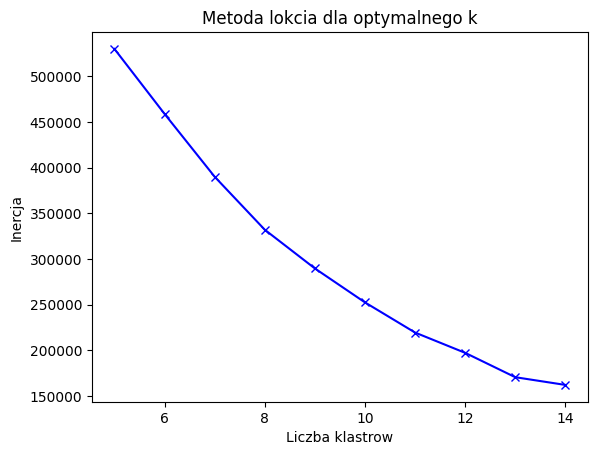

In [39]:
# Plotting the Elbow Curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Liczba klastrow')
plt.ylabel('Inercja')
plt.title('Metoda lokcia dla optymalnego k')
plt.show()


In [40]:
optimal_k = 9

#creating model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# getting centers of clusters
cluster_centers = kmeans.cluster_centers_


In [41]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print(cluster_centers_df)


      sbytes     sload     smean        dbytes      rate  ct_srv_dst  \
0   0.013355  0.075239  0.481425  9.889124e-02  0.172026    0.864337   
1   0.007651  2.587528  2.039954  8.007227e-03  0.966055    5.873381   
2   0.004151  0.157136  1.292871 -1.387779e-16  0.119976    7.010680   
3   0.002548  2.456863  0.792053  4.107825e-15  3.735819    1.075190   
4   0.348664  0.000036  0.222212  4.305711e+01  0.001196    0.267786   
5   0.031874  0.005959  0.318567  3.756822e-01  0.037240    1.161945   
6   0.349993  0.394321  4.005449  9.779242e-03  0.112759    0.493424   
7  67.655570  0.007585  6.797833  2.043038e-01  0.001268    0.182323   
8   0.205990  0.000023  0.791384  2.996714e-01  0.000030    0.497974   

        dur  ct_dst_sport_ltm         dload  ct_srv_src  
0  0.113073          0.764535  1.593095e-01    0.879906  
1  0.485354          0.773103  1.038714e-03    5.834679  
2  0.000014         23.909692  3.330669e-16    6.815400  
3  0.000473          1.307543 -9.048318e-15    

In [26]:
# Wyświetlenie unikalnych wartości kolumny 'attack_cat'
print(data['attack_cat'].unique())

['Normal' 'DoS']


Przewiduję wynik dla danych testowych

In [42]:
from sklearn.metrics import silhouette_score

# predicting labels for testing set
cluster_labels = kmeans.predict(X_test)

# calculating averge
silhouette_avg = silhouette_score(X_test, cluster_labels)
silhouette_avg

0.51386360662488

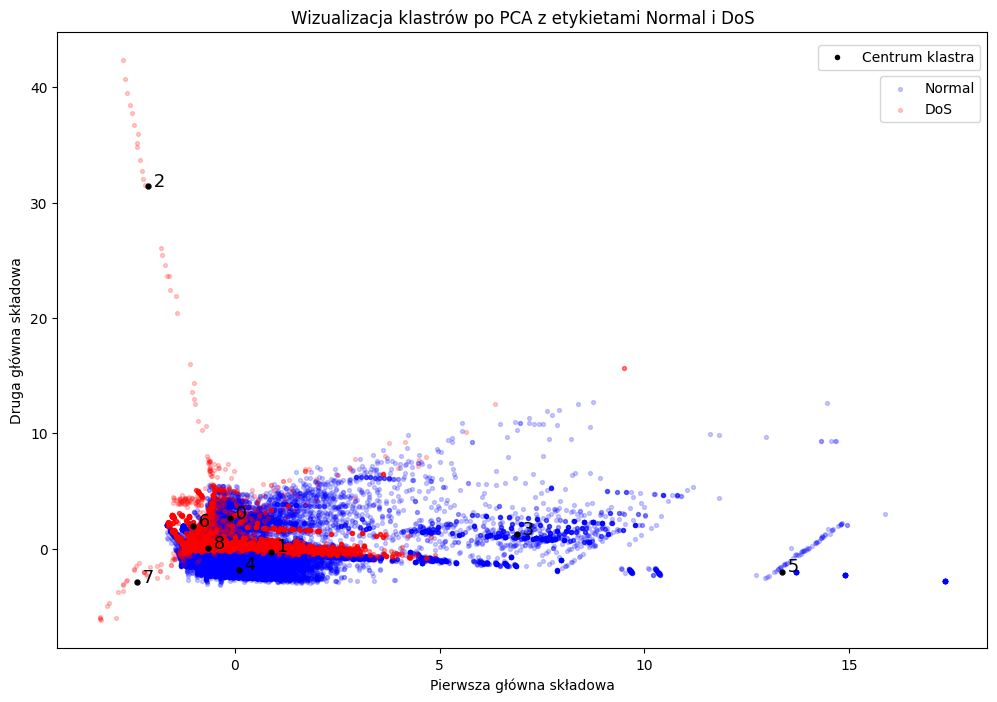

In [29]:
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Najpierw przeprowadźmy PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(data_bin_hot[selected_features])

# Mapowanie etykiet 'Normal' i 'DoS' na kolory
labels_original = data['attack_cat']
colors = {'Normal': 'blue', 'DoS': 'red'}

# Tworzenie wykresu
plt.figure(figsize=(12, 8))

# Kolorowanie punktów na podstawie etykiet 'Normal' i 'DoS'
for label, color in colors.items():
    indices = labels_original == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=color, alpha=0.2, label=label,s=8)

#adding centers of clusters to plot
centers_pca = pca.transform(kmeans.cluster_centers_)
for i, center in enumerate(centers_pca):
    plt.scatter(center[0], center[1], c='black', marker='.', s=50)
    plt.text(center[0], center[1], ' ' + str(i), color='black', fontsize=13)

plt.title('Wizualizacja klastrów po PCA z etykietami Normal i DoS')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')



# Tworzenie niestandardowych legend
legend_labels = plt.legend(loc='upper right',bbox_to_anchor=(1, 0.94))
plt.gca().add_artist(legend_labels)

# Niestandardowy wpis do legendy dla centrum klastra
cluster_center_legend = Line2D([0], [0], marker='.', color='w', label='Centrum klastra',
                          markerfacecolor='black', markersize=10)

# Dodanie legendy dla centrów klastrów
plt.legend(handles=[cluster_center_legend], loc='upper right',bbox_to_anchor=(1, 0.99))

plt.show()

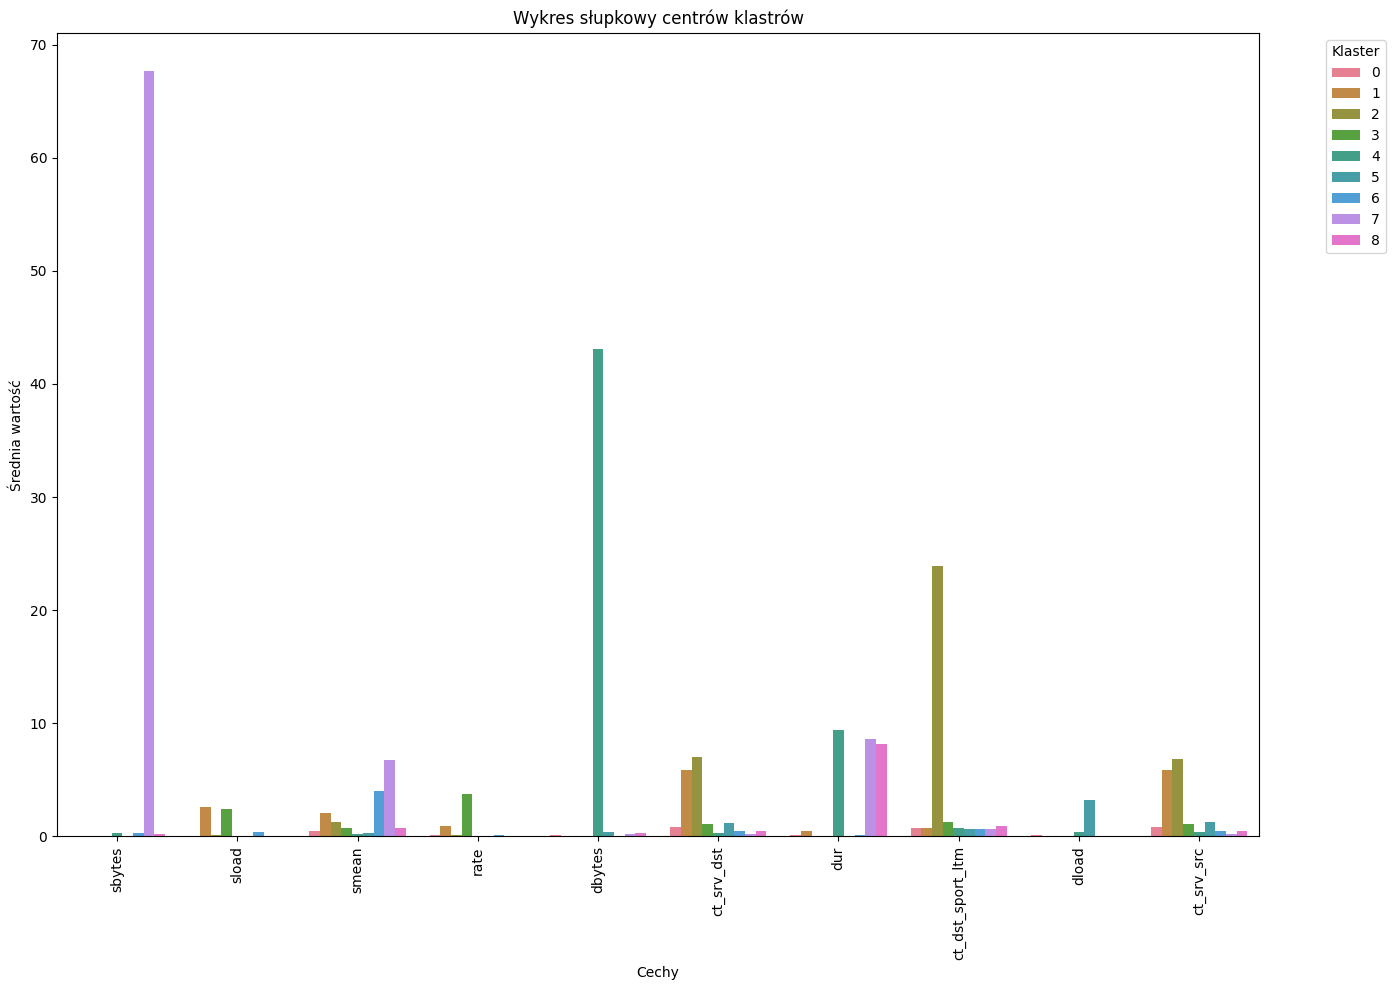

In [121]:

# Ustawienie większej liczby kolorów w palecie, aby pasowała do liczby klastrów
palette = sns.color_palette("husl", cluster_centers_df.shape[0])

# Tworzenie wykresu słupkowego dla centrów klastrów
plt.figure(figsize=(14, 10))

# Przygotowujemy dane w formacie "long" do wykresu słupkowego
melted_centers = cluster_centers_df.reset_index().melt(id_vars='index')
melted_centers.rename(columns={'index': 'Cluster', 'variable': 'Feature', 'value': 'Value'}, inplace=True)

# Tworzymy wykres słupkowy przy użyciu Seaborn
sns.barplot(x='Feature', y='Value', hue='Cluster', data=melted_centers, palette=palette)

# Dodajemy etykiety i tytuł
plt.xticks(rotation=90)  # Obracamy etykiety osi X, jeśli są zbyt długie
plt.xlabel('Cechy')
plt.ylabel('Średnia wartość')
plt.title('Wykres słupkowy centrów klastrów')

# Dodajemy legendę z wszystkimi klastrami
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Wyświetlamy wykres
plt.tight_layout()  # Dostosowanie layoutu
plt.show()

przeskalujmy dane by wykres stał się czytelniejszy

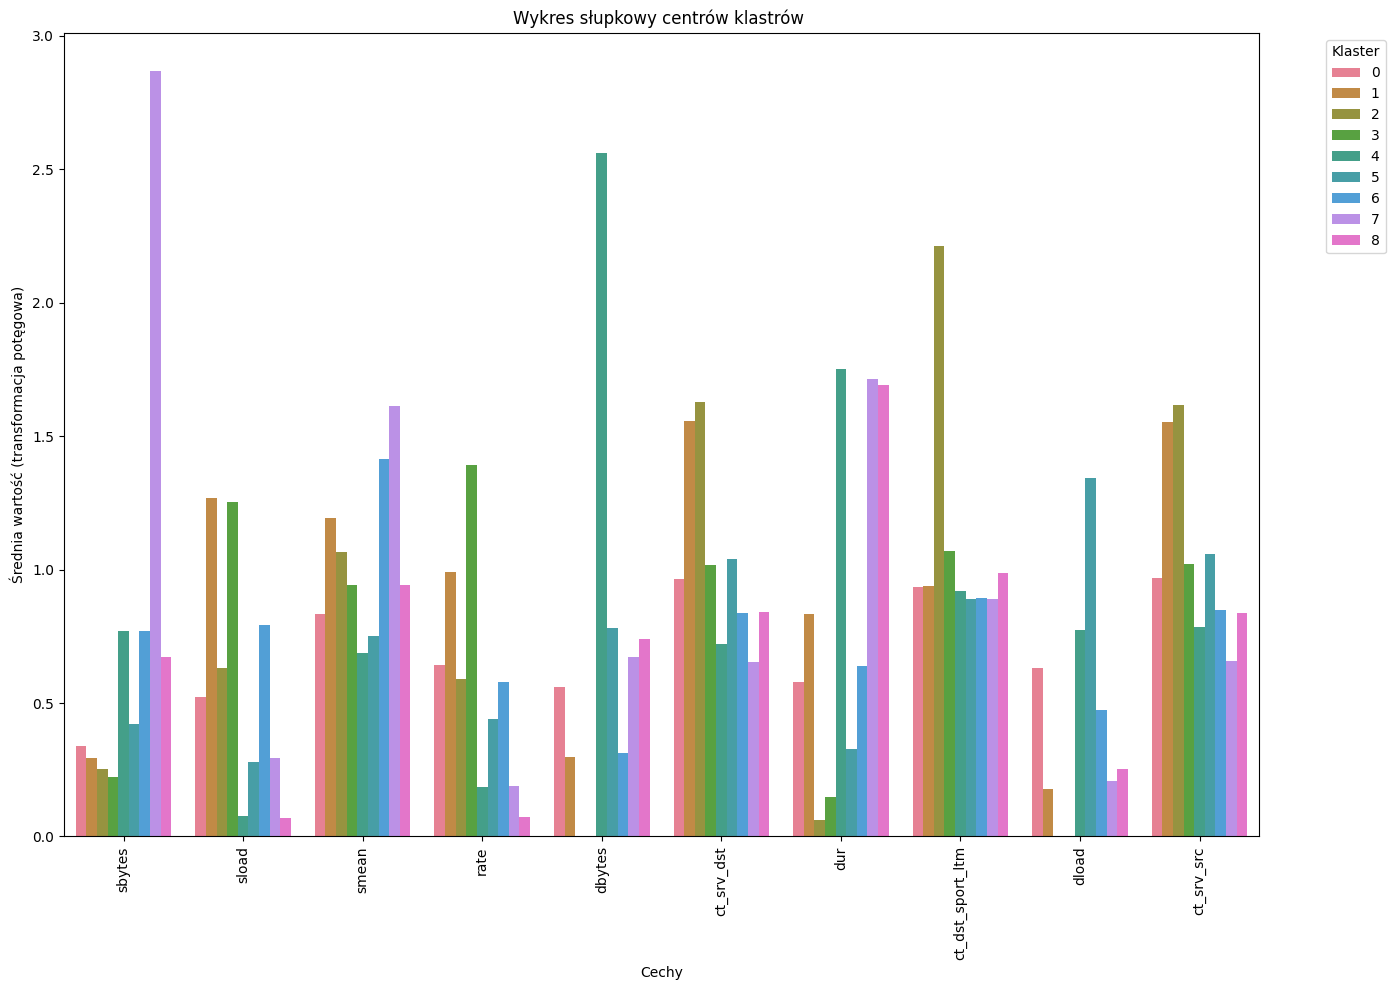

In [130]:

# Przygotowujemy dane w formacie "long" do wykresu słupkowego
melted_centers = cluster_centers_df.reset_index().melt(id_vars='index')
melted_centers.rename(columns={'index': 'Cluster', 'variable': 'Feature', 'value': 'Value'}, inplace=True)

# Ustawienie większej liczby kolorów w palecie, aby pasowała do liczby klastrów
palette = sns.color_palette("husl", cluster_centers_df.shape[0])

# Dodajemy kolumnę z przekształconymi wartościami dla cech o dużych wartościach
melted_centers['Value_power'] = np.power(melted_centers['Value'], 1/4)

# Tworzymy wykres słupkowy z przekształconymi wartościami
plt.figure(figsize=(14, 10))
sns.barplot(x='Feature', y='Value_power', hue='Cluster', data=melted_centers, palette=palette)

plt.xticks(rotation=90)
plt.xlabel('Cechy')
plt.ylabel('Średnia wartość (transformacja potęgowa)')
plt.title('Wykres słupkowy centrów klastrów ')

plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


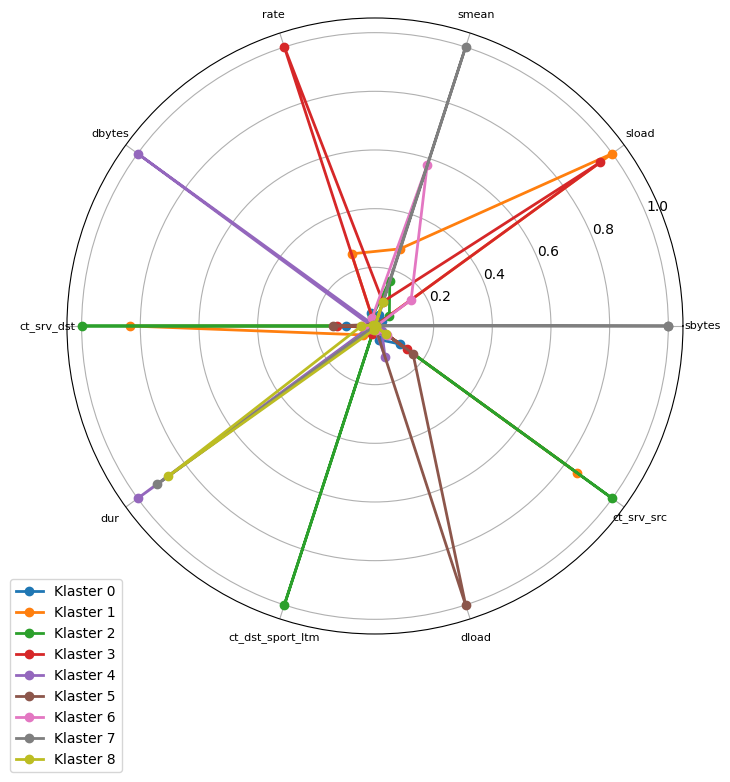

In [141]:
from math import pi
from sklearn.preprocessing import MinMaxScaler

# Skalowanie wartości centrów klastrów do zakresu [0, 1]
scaler = MinMaxScaler()
cluster_centers_scaled = scaler.fit_transform(cluster_centers_df)

# Tworzenie DataFrame z przeskalowanymi danymi
df_clusters_scaled = pd.DataFrame(cluster_centers_scaled, columns=cluster_centers_df.columns)

# Liczba klastrów / zmiennych
num_clusters = df_clusters_scaled.shape[0]
num_vars = df_clusters_scaled.shape[1]

# Kąty dla każdej osi na wykresie radarowym
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Ustawienie wykresu
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Rysowanie linii dla każdego klastra
for i, row in df_clusters_scaled.iterrows():
    data = row.tolist()
    data += data[:1]
    ax.plot(angles, data, 'o-', linewidth=2, label='Klaster {}'.format(i))

# Dodawanie etykiet dla cech
labels = list(df_clusters_scaled)
plt.xticks(angles[:-1], labels, size=8)

# Dodawanie legendy
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

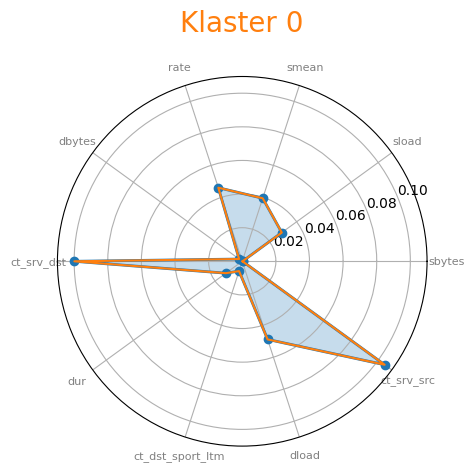

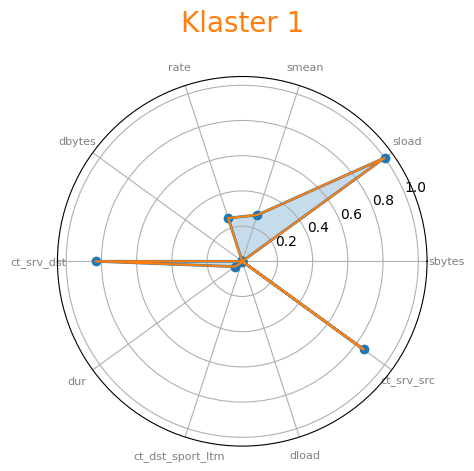

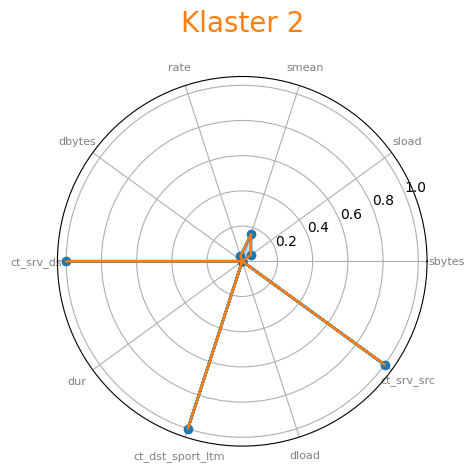

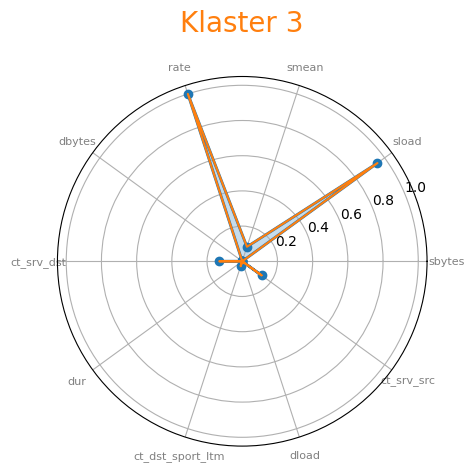

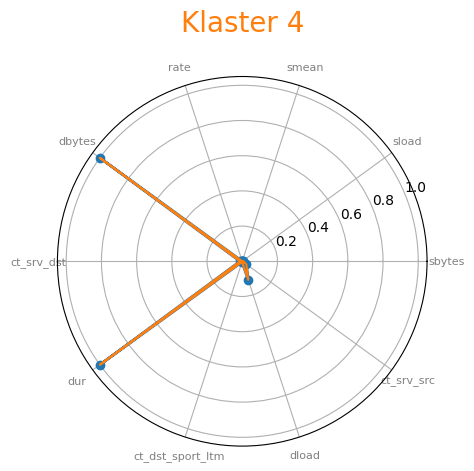

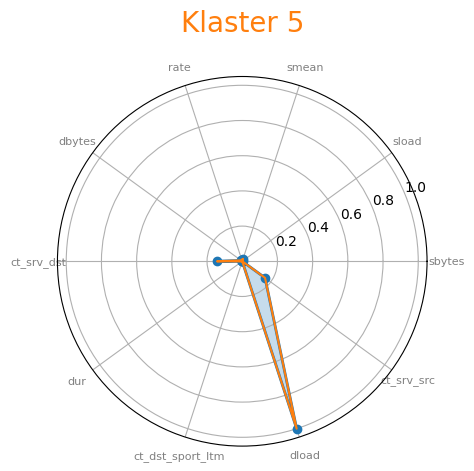

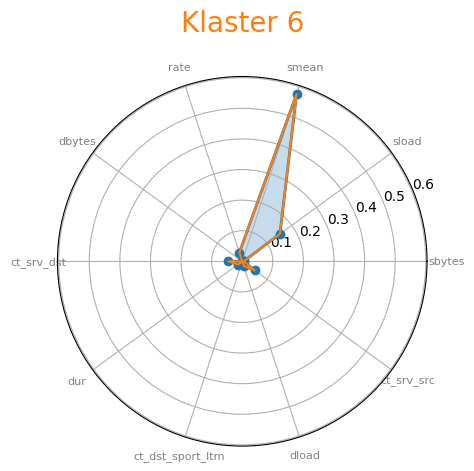

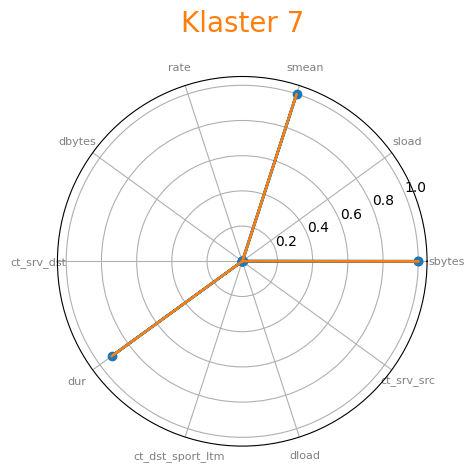

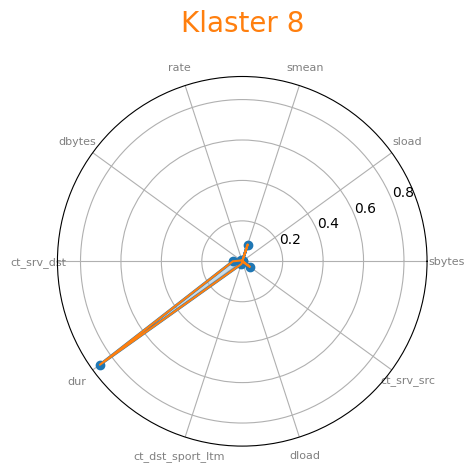

In [142]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Przygotowujemy skalowane wartości centrów klastrów
scaler = MinMaxScaler()
cluster_centers_scaled = scaler.fit_transform(cluster_centers_df)
df_clusters_scaled = pd.DataFrame(cluster_centers_scaled, columns=cluster_centers_df.columns)

# Liczba klastrów / zmiennych
num_vars = df_clusters_scaled.shape[1]

# Kąty dla każdej osi na wykresie radarowym
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Zamknięcie cyklu

# Tworzymy wykresy radarowe
for i in range(len(df_clusters_scaled)):
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    
    # Dane dla i-tego klastra
    values = df_clusters_scaled.iloc[i].tolist()
    values += values[:1]
    
    # Dodajemy dane do wykresu
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    
    # Dodajemy etykiety dla cech
    plt.xticks(angles[:-1], df_clusters_scaled.columns, color='grey', size=8)
    
    # Dodajemy tytuł
    plt.title(f'Klaster {i}', size=20, color=ax.plot(angles, values)[0].get_color(), y=1.1)

    # Wyświetlamy wykres
    plt.show()

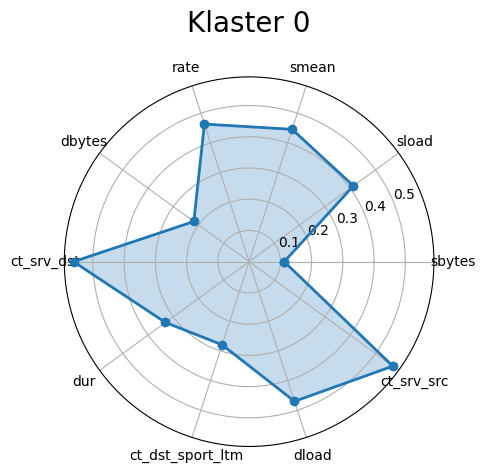

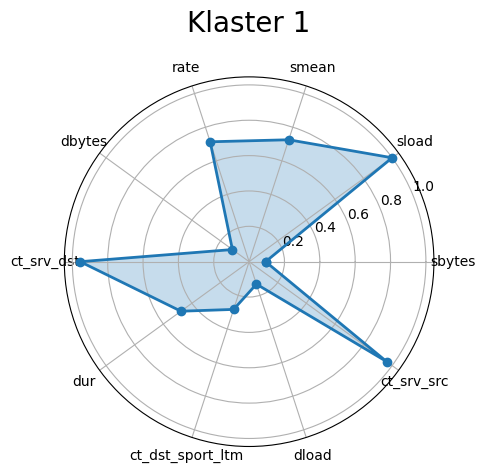

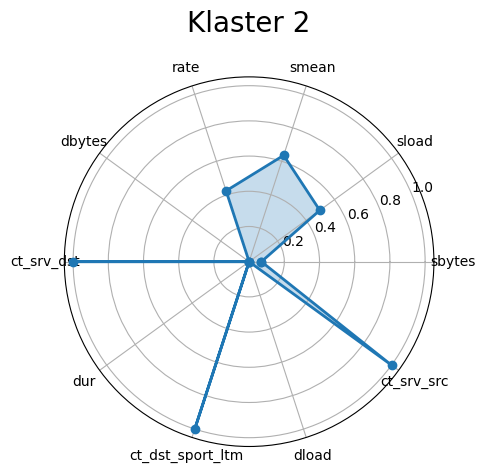

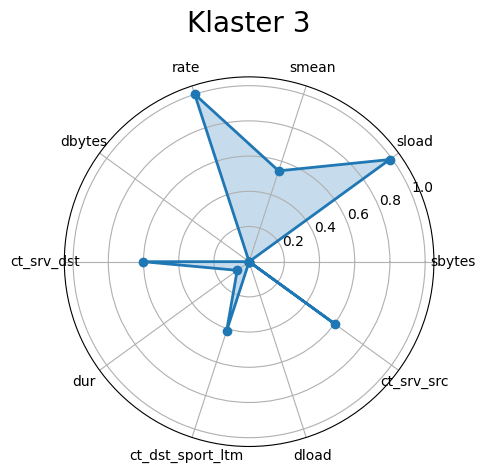

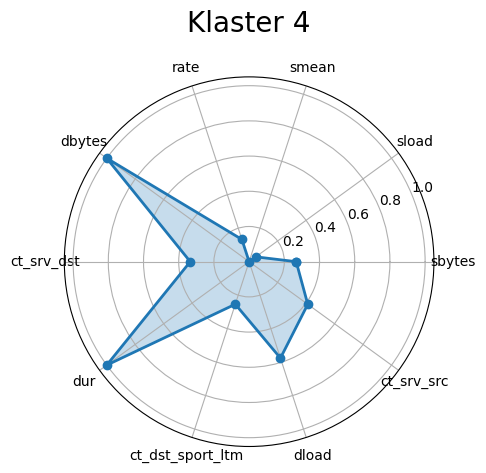

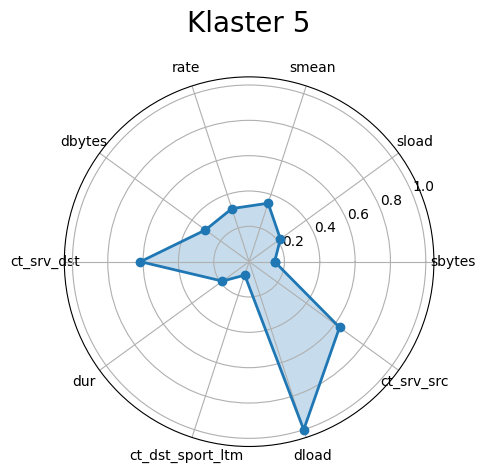

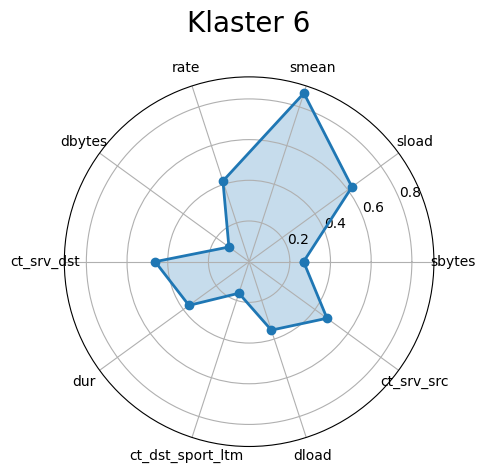

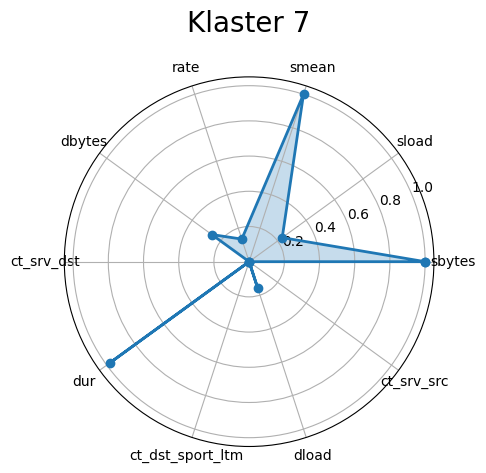

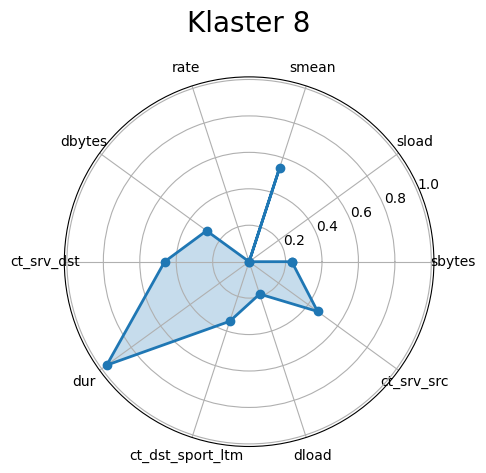

In [198]:
from math import pi
from sklearn.preprocessing import MinMaxScaler


# Skalowanie wartości centrów klastrów do zakresu [0, 1]
scaler = MinMaxScaler()
cluster_centers_scaled = scaler.fit_transform(cluster_centers_df)
df_clusters_scaled = pd.DataFrame(cluster_centers_scaled, columns=cluster_centers_df.columns)

# Stosowanie transformacji potęgowej do znormalizowanych danych
df_clusters_scaled = df_clusters_scaled.apply(lambda x: np.power(x, 1/4))

# Liczba zmiennych (cech)
num_vars = df_clusters_scaled.shape[1]

# Kąty dla każdej osi na wykresie radarowym
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Zamknięcie cyklu


# Promień, na którym będą umieszczone etykiety cech
label_radius = 1.1 * max(values)
# Tworzenie wykresów radarowych dla każdego klastra
for i in range(len(df_clusters_scaled)):
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    
    # Pobieranie i przekształcanie wartości dla i-tego klastra
    values = df_clusters_scaled.iloc[i].tolist()
    values += values[:1]
    
    # Dodajemy dane do wykresu
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Klaster {i}')
    ax.fill(angles, values, alpha=0.25)
    
    # Dodajemy etykiety dla cech
    plt.xticks(angles[:-1], df_clusters_scaled.columns, color='black', size=10)
    
    # Dodajemy tytuł i wyświetlamy wykres
    plt.title(f'Klaster {i}', size=20, y=1.1)
    plt.show()

In [127]:
# # Split the data into training and test sets
# X_all = data_bin_hot.drop('label', axis=1)
# y = data_bin_hot['label']
# X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2)


In [161]:

# # Elbow Method to find the optimal number of clusters
# inertia = []
# K = range(2, 22)  # Adjust the range of K if necessary
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_train, y_train)
#     inertia.append(kmeans.inertia_)



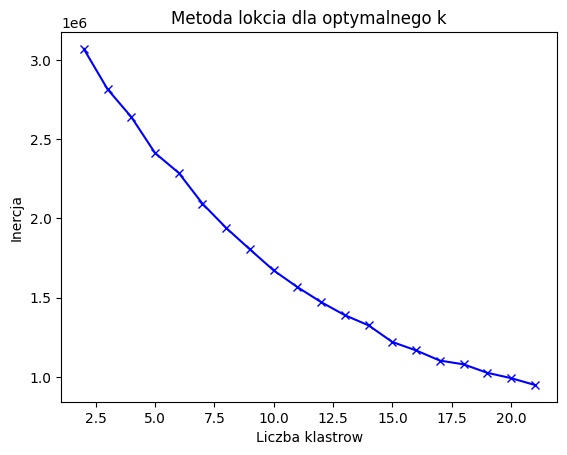

In [129]:
# # Plotting the Elbow Curve
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('Liczba klastrow')
# plt.ylabel('Inercja')
# plt.title('Metoda lokcia dla optymalnego k')
# plt.show()


In [145]:
# optimal_k = 13

# #creating model with optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# kmeans.fit(X_all)

# # getting centers of clusters
# cluster_centers = kmeans.cluster_centers_


In [146]:
# cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_all.columns)
# print(cluster_centers_df)


         dur      spkts         dpkts     sbytes        dbytes          rate  \
0   0.249021   0.159802  6.228877e-02   0.066666  4.359791e-03  2.366768e-04   
1   0.290679   0.040031  3.360494e-04   0.005689  1.927408e-04  1.756108e+00   
2   0.057908   0.407406  2.942427e-01   0.048233  1.095520e-01  2.435057e-02   
3   0.510337   0.009987  5.273559e-16   0.000403  4.718448e-15  7.058288e-09   
4   8.628950  58.192685  6.209354e+00  67.655570  2.043038e-01  1.267500e-03   
5   0.204659   0.442448  3.162795e-01   0.032992  1.676493e-02  8.222710e-03   
6   2.026222   0.104923  5.808435e-02   0.010101  9.918476e-03  2.057936e-04   
7   0.473208   0.033746  2.185315e-03   0.007349  1.967524e-04  9.611195e-01   
8   0.101396   0.032169  1.832080e-02   0.008167  1.603427e-03  2.610241e-02   
9   9.400495   9.170167  4.252456e+01   0.348664  4.305711e+01  1.196121e-03   
10  0.195160   0.131491  9.083050e-02   0.040139  2.960351e-02  3.066565e-03   
11  1.063853   3.066055  4.239052e+00   

In [147]:

# # predicting labels for testing set
# cluster_labels = kmeans.predict(X_test)

# # calculating averge
# silhouette_avg = silhouette_score(X_test, cluster_labels)
# silhouette_avg


0.3275505237385908

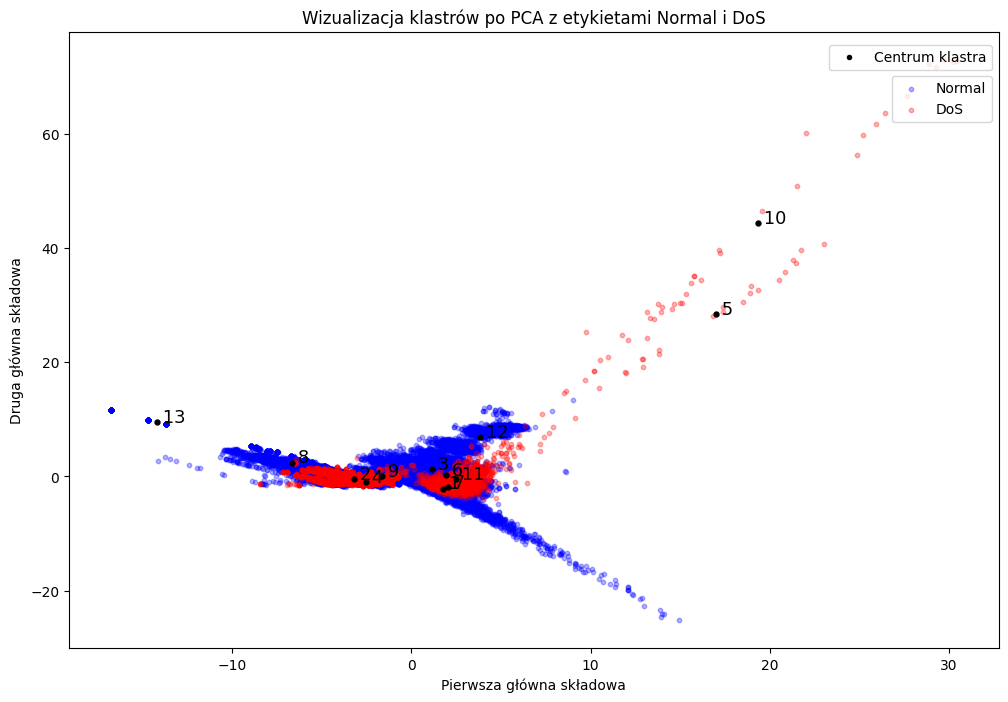

In [148]:
# import matplotlib.patches as mpatches
# from sklearn.decomposition import PCA
# from matplotlib.lines import Line2D

# # Najpierw przeprowadźmy PCA
# pca = PCA(n_components=12)
# X_pca = pca.fit_transform(data_bin_hot.drop('label', axis=1))

# # Mapowanie etykiet 'Normal' i 'DoS' na kolory
# labels_original = data['attack_cat']
# colors = {'Normal': 'blue', 'DoS': 'red'}

# # Tworzenie wykresu
# plt.figure(figsize=(12, 8))

# # Kolorowanie punktów na podstawie etykiet 'Normal' i 'DoS'
# for label, color in colors.items():
#     indices = labels_original == label
#     plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=color, alpha=0.3, label=label,s=10)

# #adding centers of clusters to plot
# centers_pca = pca.transform(kmeans.cluster_centers_)
# for i, center in enumerate(centers_pca):
#     plt.scatter(center[0], center[1], c='black', marker='.', s=50)
#     plt.text(center[0], center[1], ' ' + str(i+1), color='black', fontsize=13)

# plt.title('Wizualizacja klastrów po PCA z etykietami Normal i DoS')
# plt.xlabel('Pierwsza główna składowa')
# plt.ylabel('Druga główna składowa')



# # Tworzenie niestandardowych legend
# legend_labels = plt.legend(loc='upper right',bbox_to_anchor=(1, 0.94))
# plt.gca().add_artist(legend_labels)

# # Niestandardowy wpis do legendy dla centrum klastra
# cluster_center_legend = Line2D([0], [0], marker='.', color='w', label='Centrum klastra',
#                           markerfacecolor='black', markersize=10)

# # Dodanie legendy dla centrów klastrów
# plt.legend(handles=[cluster_center_legend], loc='upper right',bbox_to_anchor=(1, 0.99))

# plt.show()